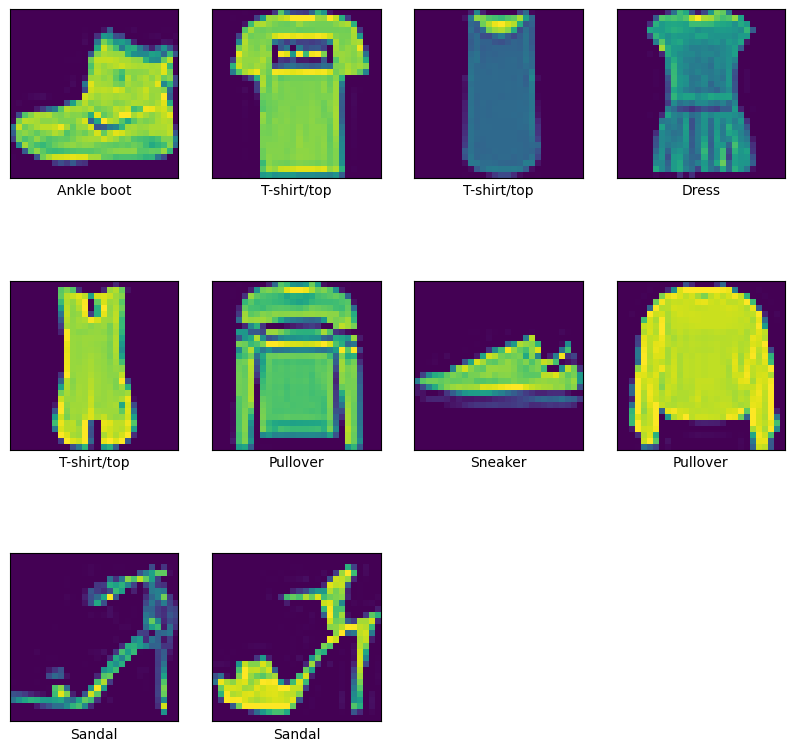

Epoch 1/10


2024-02-21 15:52:41.627343: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.5000 - accuracy: 0.8132
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3144 - accuracy: 0.8841
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2684 - accuracy: 0.9010
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2390 - accuracy: 0.9117
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2170 - accuracy: 0.9186
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1938 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1768 - accuracy: 0.9343
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1630 - accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1496 - accuracy: 0.9444
Epoch 10/10
1/1 [==============================] - 0s 62ms/step
[[8.5358884

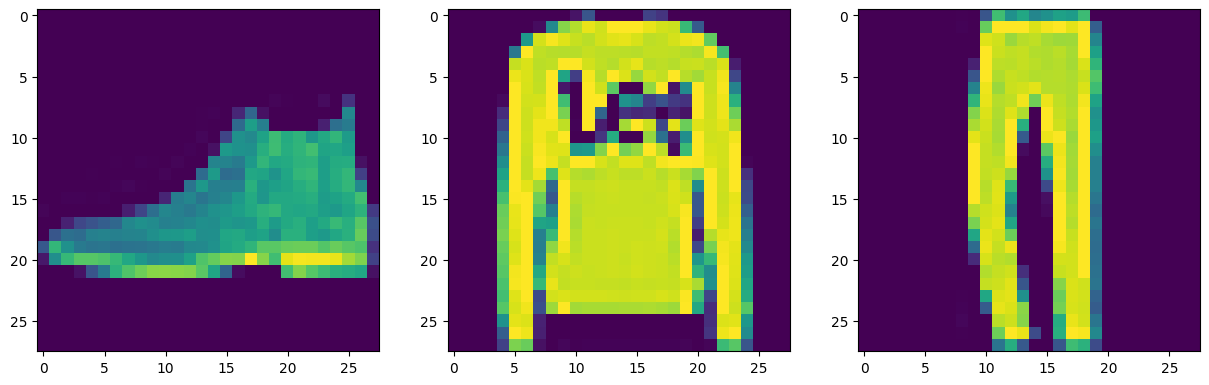

In [22]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

#MNIST / Fashion Mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train=f_image_train.reshape(60000, 28, 28, 1)
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(f_image_train, f_label_train, epochs=10)

num = 3
predic = model.predict(f_image_test[0:num])
print(predic)

print(" * predictation, ", np.argmax(predic, axis=1))
plt.figure(figsize=(15, 15))
for idx in range(num):
    sp = plt.subplot(1, 3, idx+1)
    plt.imshow(f_image_test[idx])
plt.show()

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(54, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
#Helper libraires
import numpy as np
import matplotlib.pyplot as plt
import cv2

#MNIST / Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
print(f_image_train.shape)
print(f_label_train.shape)

f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

f_image_train = tf.expand_dims(f_image_train, axis=3, name=None)
f_image_test = tf.expand_dims(f_image_test, axis=3, name=None)
f_image_train = tf.repeat(f_image_train, 3, axis=3)
f_image_test = tf.repeat(f_image_test, 3, axis=3, name=None)

f_image_val = f_image_train[101:120,:,:,:]
f_image_train = f_image_train[:100,:,:,:]
f_label_val = f_label_train[101:120]
f_label_train = f_label_train[:100]

print(f_image_train.shape)
print(f_label_train.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

''' googlenet : inception'''
def Inception(x, filters):
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding = 'same', activation = 'relu')(x)
    
    ''' 1x1 convolution -> 3x3 convolution '''
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding = 'same', activation = 'relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding = 'same', activation = 'relu')(path2)

    ''' 1x1 convolution -> 5x5 convolution '''
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding = 'same', activation = 'relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding = 'same', activation = 'relu')(path3)

    ''' 3x3 Maxpooling -> 1x1 convolution '''
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding = 'same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding = 'same', activation = 'relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])

def Auxiliary_classifier(x, name=None):
    model=AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    model=Conv2D(128, (1,1),1,padding='same',activation='relu')(model)
    model=Flatten()(model)
    model=Dense(256, activation='relu')(model)
    model=Dropout(0.4)(model)
    model=Dense(10,activation='softmax',name=name)(model)
    return model
    
# stage 1 (conv, polling, normalize, conv, conv, normalize, pooling)
model_in = Input(shape=f_image_train.shape[1:])
model = tf.keras.layers.Resizing(224, 224, interpolation='bilinear', crop_to_aspect_ratio=True, input_shape=f_image_train.shape[1:], name="Resizing_Layer")(model_in)

#model = tf.keras.layers.Rescaling(1./255)(model)
model = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding = 'same', activation = 'relu')(model)
model = MaxPooling2D(pool_size=(3,3), strides=2, padding = 'same')(model)
model = BatchNormalization()(model)

# stage 2
model = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(model)
model = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(model)
model = BatchNormalization()(model)
model = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(model)

# stage 3
model = Inception(model, [64, (96, 128), (16, 32), 32])
model = Inception(model, [128, (128, 192), (32, 96), 64])
model = MaxPooling2D(pool_size=(3,3), strides=2, padding= 'same')(model)

# stage 4
model = Inception(model, [192, (96, 208), (16, 48), 64]) #a
aux1 = Auxiliary_classifier(model, name = 'aux1')
model = Inception(model, [168, (112, 224), (24, 64), 64]) #b
model = Inception(model, [128, (128, 256), (24, 64), 64]) #c
model = Inception(model, [112, (144, 288), (32, 64), 64]) #d
aux2 = Auxiliary_classifier(model, name = 'aux2')
model = Inception(model, [256, (160, 320), (32, 128), 128]) #e
model = MaxPooling2D(pool_size=(3,3), strides=2, padding= 'same')(model)

# stage 5
model = Inception(model, [256, (160, 320), (32, 128), 128])
model = Inception(model, [384, (192, 384), (48, 128), 128]) #e
model = AveragePooling2D(pool_size=(7,7), strides=1, padding= 'valid')(model)

# stage 6
model = Flatten()(model)
model = Dropout(0.4)(model)
#model = Dense(480, activation='linear')
model = Dense(units=256, activation='linear')(model)
main_branch = Dense(units=10, activation='softmax', name='main')(model)
model_fin = Model(inputs=model_in, outputs=[main_branch, aux1, aux2])

model_fin.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_fin.fit(f_image_train, f_label_train, epochs=100, batch_size = 5)
model_fin.save('GoogleNet_mnist.h5')


(60000, 28, 28)
(60000,)
(100, 28, 28, 3)
(100,)
Epoch 1/100
20/20 [==============================] - 13s 324ms/step - loss: 7.7398 - main_loss: 2.6981 - aux1_loss: 2.6485 - aux2_loss: 2.3932 - main_accuracy: 0.1000 - aux1_accuracy: 0.1200 - aux2_accuracy: 0.1000
Epoch 2/100
20/20 [==============================] - 6s 316ms/step - loss: 6.6280 - main_loss: 2.3061 - aux1_loss: 2.0275 - aux2_loss: 2.2944 - main_accuracy: 0.0900 - aux1_accuracy: 0.2500 - aux2_accuracy: 0.1200
Epoch 3/100
20/20 [==============================] - 6s 315ms/step - loss: 6.2757 - main_loss: 2.2662 - aux1_loss: 1.8662 - aux2_loss: 2.1433 - main_accuracy: 0.1500 - aux1_accuracy: 0.3300 - aux2_accuracy: 0.1400
Epoch 4/100
20/20 [==============================] - 6s 316ms/step - loss: 5.8328 - main_loss: 2.3459 - aux1_loss: 1.5049 - aux2_loss: 1.9819 - main_accuracy: 0.0900 - aux1_accuracy: 0.4500 - aux2_accuracy: 0.3000
Epoch 5/100
20/20 [==============================] - 6s 316ms/step - loss: 4.9843 - main_loss:

/home/chj/intel01-https/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
import tensorflow as tf
# Helper libraires
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model('./GoogleNet_mnist.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()

f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
f_image_train = tf.expand_dims(f_image_train, axis=3, name=None)
f_image_test  = tf.expand_dims(f_image_test, axis=3, name= None)
f_image_train = tf.repeat(f_image_train, 3, axis=3)
f_image_test  = tf.repeat(f_image_test, 3, axis=3, name=None)

num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, \n", np.argmax(predict, axis = 1))

1/1 [==============================] - 0s 424ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction, 
 [[4 3 5 3 3 8 1 6 3 0]
 [1 4 5 3 2 9 1 6 0 0]
 [2 3 5 3 3 8 1 6 3 0]]
